In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import Adam


In [7]:
data = pd.read_csv('/kaggle/input/modeldata/data1.csv')

X = data.drop(columns=['label'])  # Features
y = data['label']  # Target variable

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [10]:
from tensorflow.keras.regularizers import l2


In [13]:
from tensorflow.keras import Input

model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Input layer with the required shape
    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Output layer
])


In [15]:
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [16]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, 
                    validation_split=0.2, 
                    epochs=200, 
                    batch_size=16,  
                    callbacks=[early_stopping],
                    verbose=1)


Epoch 1/200
2940/2940 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.0068 - loss: -46487920705536.0000 - val_accuracy: 0.0076 - val_loss: -948127116820480.0000
Epoch 2/200
2940/2940 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.0062 - loss: -2216770463072256.0000 - val_accuracy: 0.0076 - val_loss: -8918988679544832.0000
Epoch 3/200
2940/2940 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.0062 - loss: -13415080167211008.0000 - val_accuracy: 0.0076 - val_loss: -31888787848036352.0000
Epoch 4/200
2940/2940 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.0062 - loss: -41494671184101376.0000 - val_accuracy: 0.0076 - val_loss: -79484760723816448.0000
Epoch 5/200
2940/2940 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.0066 - loss: -96971153133797376.0000 - val_accuracy: 0.0076 - val_loss: -162372870712852480.0000
Epoch 6/200
2940/2940 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.0059 - loss: -191594934841638912.0000 - val_accuracy: 0.0076 - val_loss: -294166467631382528.0000
Epoch 7/200
29

In [17]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

y_pred = (model.predict(X_test) > 0.5).astype("int32")

print(classification_report(y_test, y_pred))

460/460 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0077 - loss: -136846261183689579823104.0000
Test Accuracy: 0.76%
460/460 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        94
           1       0.01      1.00      0.02       112
           2       0.00      0.00      0.00       102
           3       0.00      0.00      0.00        98
           4       0.00      0.00      0.00        93
           5       0.00      0.00      0.00       106
           6       0.00      0.00      0.00       194
           7       0.00      0.00      0.00       209
           8       0.00      0.00      0.00       202
           9       0.00      0.00      0.00       203
          10       0.00      0.00      0.00       192
          11       0.00      0.00      0.00       589
          12       0.00      0.00      0.00       509
          13       0.00      0.00      0.00       481
          14       0.00     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.activations import swish

# Load the dataset
data = pd.read_csv('data1.csv')

# Separate features and labels
X = data.drop(columns=['label'])  # Features
y = data['label']  # Target variable

# Encode the labels if they are categorical
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Input layer with the required shape
    Dense(256, activation=swish, kernel_regularizer=l2(0.01)),  # Swish activation
    Dropout(0.3),
    Dense(128, activation=swish, kernel_regularizer=l2(0.01)),  # Swish activation
    Dropout(0.3),
    Dense(64, activation=swish, kernel_regularizer=l2(0.01)),  # Swish activation
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=20, 
                    batch_size=32)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Epoch 1/20
1838/1838 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.0069 - loss: -484833088.0000 - val_accuracy: 0.0076 - val_loss: -11366008832.0000
Epoch 2/20
1838/1838 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.0070 - loss: -28098635776.0000 - val_accuracy: 0.0076 - val_loss: -120769921024.0000
Epoch 3/20
1838/1838 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.0065 - loss: -182683041792.0000 - val_accuracy: 0.0076 - val_loss: -440125095936.0000
Epoch 4/20
1838/1838 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.0066 - loss: -573363912704.0000 - val_accuracy: 0.0076 - val_loss: -1087093997568.0000
Epoch 5/20
1838/1838 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.0064 - loss: -1329218060288.0000 - val_accuracy: 0.0076 - val_loss: -2187779112960.0000
Epoch 6/20
1838/1838 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.0062 - loss: -2547637026816.0000 - val_accuracy: 0.0076 - val_loss: -3896755355648.0000
Epoch 7/20
1838/1838 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.0064 

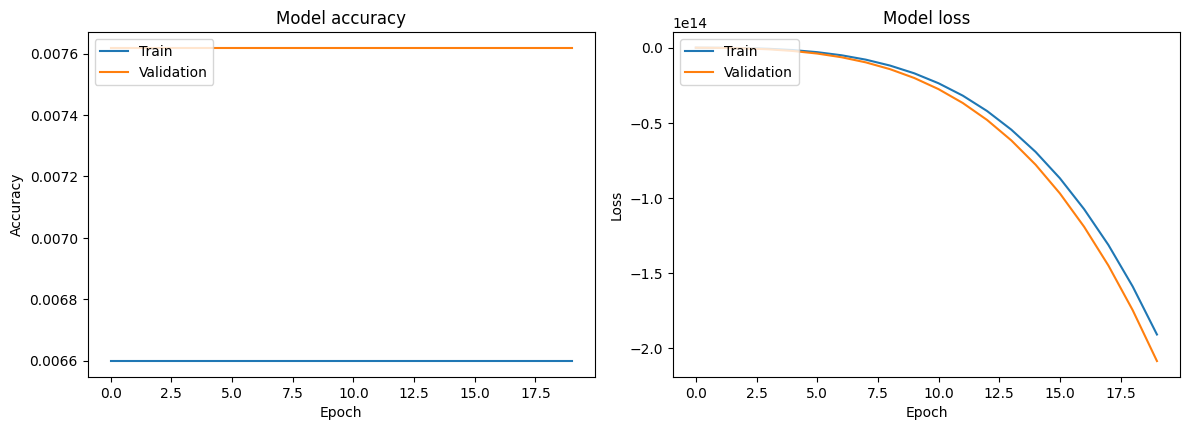

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(2, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation precision values (if applicable)
if 'precision' in history.history:
    plt.subplot(2, 2, 3)
    plt.plot(history.history['precision'])
    plt.plot(history.history['val_precision'])
    plt.title('Model precision')
    plt.ylabel('Precision')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation recall values (if applicable)
if 'recall' in history.history:
    plt.subplot(2, 2, 4)
    plt.plot(history.history['recall'])
    plt.plot(history.history['val_recall'])
    plt.title('Model recall')
    plt.ylabel('Recall')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [7]:
final_train_accuracy = history.history['accuracy'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]
print(f"Final Training Accuracy: {final_train_accuracy * 100:.2f}%")
print(f"Final Validation Accuracy: {final_val_accuracy * 100:.2f}%")


Final Training Accuracy: 0.66%
Final Validation Accuracy: 0.76%
